# Connect to Drive:

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Homework 1

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/.shortcut-targets-by-id/1PxSEPrUvbOdLw4oR6K3poPNcUFwahzGX/Homework 1


# Libraries:

In [ ]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [ ]:
# Import other libraries
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
#https://keras.io/api/applications/
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Data import:

In [ ]:
data = np.load('public_data.npz', allow_pickle=True)
X0 = data['data']
y0 = data['labels']
#X0 =(X0/255).astype(np.float32)
print(np.shape(X0))
print(np.shape(y0))
#classnames, y0 = np.unique(y0, return_inverse=True)
#y0= tfk.utils.to_categorical(y0,2)
#print(np.shape(y0))

(5200, 96, 96, 3)
(5200,)


# Preprocessing:

## Visualization:

In [ ]:
# Number of images to display
num_img = 10

# Create subplots for displaying items
fig, axes = plt.subplots(2, num_img//2, figsize=(20, 9))
for i in range(num_img):
    ax = axes[i%2, i%num_img//2]
    ax.imshow(np.clip(X0[i], 0, 255))  # Display clipped item images
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
plt.imshow(np.clip(X0[58], 0, 255))

In [ ]:
plt.imshow(np.clip(X0[2150], 0, 255))

## Cleaning:

In [ ]:
# cleaning images from trol and shrek
ref_img = X0[58]
ref_img2 = X0[2150]
c = 0
c2 = 0
rm_indexes = []
rm2_indexes = []
for i in range(0, len(X0)):
    deviation = np.mean(np.abs(ref_img - X0[i]))
    deviation2 = np.mean(np.abs(ref_img2 - X0[i]))
    if(deviation == 0.0):
        #print(i)
        c += 1
        rm_indexes.append(i)
    elif(deviation2 == 0.0):
        c2 += 1
        rm2_indexes.append(i)

# clean dataset:
X = np.delete(X0, rm_indexes + rm2_indexes, axis=0)
y = np.delete(y0, rm_indexes + rm2_indexes, axis=0)
print(X.shape)
print(y.shape)

(5004, 96, 96, 3)
(5004,)


In [ ]:
# Inspect the target
labels = np.argmax(y, axis=1)
print('Counting occurrences of target classes:')
print(pd.DataFrame(labels, columns=['digit'])['digit'].value_counts())

Counting occurrences of target classes:
0    3101
1    1903
Name: digit, dtype: int64


## Cleaning via PCA: (todo)

In [ ]:
# build dataset X, matrice delle latent representations

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pca.fit(X)

In [ ]:
# mean:

mean_shape = pca.mean_
plt.figure(figsize = (12,7))
plt.plot(range(2*R), mean_shape, label = 'mean shape')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend(loc = 'upper right')
plt.title('Mean Signal')


# basis:

PHI = pca.components_
print(np.shape(PHI))
# -> è una matrice avente per ogni riga l' i-esimo autovettore, i.e. l'asse principale, detto in questo caso (functional PCA) base

# first three Principal Axis:
phi_1 = pca.components_[0, :]
phi_2 = pca.components_[1, :]
phi_3 = pca.components_[2, :]

plt.figure(figsize = (12,7))
plt.plot(range(2*R),phi_1, label = '1st PA')
plt.plot(range(2*R),phi_2, label = '2nd PA')
plt.plot(range(2*R),phi_3, label = '3rd PA')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend(loc = 'upper right')
plt.title('Basis')


plt.figure(figsize = (12,7))
plt.plot(range(2*R), mean_shape, label = 'mean shape')
plt.plot(range(2*R),phi_1 + mean_shape, label = '1st PA')
#plt.plot(range(2*R),phi_2 + mean_shape, label = '2nd PA')
#plt.plot(range(2*R),phi_3 + mean_shape, label = '3rd PA')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend(loc = 'upper right')
plt.title('PCA behaviour around mean')

plt.figure(figsize = (12,7))
plt.plot(range(2*R), mean_shape, label = 'mean shape')
#plt.plot(range(2*R),phi_1 + mean_shape, label = '1st PA')
plt.plot(range(2*R),phi_2 + mean_shape, label = '2nd PA')
#plt.plot(range(2*R),phi_3 + mean_shape, label = '3rd PA')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend(loc = 'upper right')
plt.title('PCA behaviour around mean')

plt.figure(figsize = (12,7))
plt.plot(range(2*R), mean_shape, label = 'mean shape')
#plt.plot(range(2*R),phi_1 + mean_shape, label = '1st PA')
#plt.plot(range(2*R),phi_2 + mean_shape, label = '2nd PA')
plt.plot(range(2*R),phi_3 + mean_shape, label = '3rd PA')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend(loc = 'upper right')
plt.title('PCA behaviour around mean')

plt.show()

In [ ]:
# screeplot:

ratios = pca.explained_variance_ratio_
exp_var = np.cumsum(ratios)

plt.figure(figsize = (12,7))
plt.plot(exp_var, marker='*')
plt.xlabel('PCs')
plt.ylabel('Explained Variance Ratio')
plt.title('Screeplot')

plt.show()

In [ ]:
# scores for the first two PC:
PHI = pca.components_
#print(np.shape(phi_1))

coefficient_1 = np.dot(S,phi_1)
coefficient_2 = np.dot(S,phi_2)
coefficient_3 = np.dot(S,phi_3)

print(np.shape(coefficient_2))

In [ ]:
# plot of the scores: PC1 vs PC2
plt.figure(figsize = (12,7))
plt.scatter(coefficient_1,coefficient_2)
plt.xlabel('Scores 1st PC')
plt.ylabel('Scores 2nd PC')
plt.title('PC1 vs PC2')

# plot of the scores: PC1 vs PC3
plt.figure(figsize = (12,7))
plt.scatter(coefficient_1,coefficient_3)
plt.xlabel('Scores 1st PC')
plt.ylabel('Scores 3rd PC')
plt.title('PC1 vs PC3')

# plot of the scores: PC2 vs PC3
plt.figure(figsize = (12,7))
plt.scatter(coefficient_2,coefficient_3)
plt.xlabel('Scores 2st PC')
plt.ylabel('Scores 3nd PC')
plt.title('PC2 vs PC3')

plt.show()


# let's focus on the behaviour of the scores for the 2nd PC:
# - there is a general trend for which the score is close to zero, i.e. the associated signals do not have the behaviour represented by the 2nd basis, they are likely the normal morfology signals
# - we also observe a cluster of signals showing higher value for the 2nd PC's score. These signals are probably the ones having focal morfology
# -> we can then use the value of the score for the second PC as a predictor for detecting the focal morfology
#
#
# idea: regressione logistica, per farla bisogna aggiungere al datset la variabile binaria determinata a occhio e usare lo score value per la seconda PC come predictor

In [ ]:
# proviamo a raggrupparre in due cluster: -> NO
from sklearn.cluster import AgglomerativeClustering

data = list(zip(coefficient_1, coefficient_2))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(coefficient_1, coefficient_2, c=labels)
plt.show()

sum(labels)

In [ ]:

plt.figure(figsize = (12,7))
plt.scatter(coefficient_1,coefficient_2)

ind_focal = []
for i, x in enumerate(coefficient_1):
    if x > 0.7:
        ind_focal.append(i)


print(ind_focal)
N = len(coefficient_1)
colors = ['red' if i in ind_focal else 'blue' for i in range(N)]

plt.scatter(coefficient_1,coefficient_2, c=colors)
plt.xlabel('Scores 1st PC')
plt.ylabel('Scores 2nd PC')
plt.title('PC1 vs PC2')


ind = []
for i, x in enumerate(coefficient_2):
    if x > 2 and x < 2.2:
        ind.append(i)
print(ind)

len(ind_focal)


# Data Split:

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=seed, test_size=0.1, stratify=y)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (4503, 96, 96, 3), y_train shape: (4503,)
X_val shape: (501, 96, 96, 3), y_val shape: (501,)


# Hyperparameters:

In [ ]:
AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 128
EPOCHS = 5
CROP_TO = 32
SEED = 26

PROJECT_DIM = 2048
LATENT_DIM = 512
WEIGHT_DECAY = 0.0005

# Data Augmentation pipeline:

In [ ]:
def flip_random_crop(image):
    # With random crops we also apply horizontal flipping.
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_crop(image, (CROP_TO, CROP_TO, 3))
    return image


def color_jitter(x, strength=[0.4, 0.4, 0.4, 0.1]):
    x = tf.image.random_brightness(x, max_delta=0.8 * strength[0])
    x = tf.image.random_contrast(
        x, lower=1 - 0.8 * strength[1], upper=1 + 0.8 * strength[1]
    )
    x = tf.image.random_saturation(
        x, lower=1 - 0.8 * strength[2], upper=1 + 0.8 * strength[2]
    )
    x = tf.image.random_hue(x, max_delta=0.2 * strength[3])
    # Affine transformations can disturb the natural range of
    # RGB images, hence this is needed.
    x = tf.clip_by_value(x, 0, 255)
    return x


def color_drop(x):
    x = tf.image.rgb_to_grayscale(x)
    x = tf.tile(x, [1, 1, 3])
    return x


def random_apply(func, x, p):
    if tf.random.uniform([], minval=0, maxval=1) < p:
        return func(x)
    else:
        return x


def custom_augment(image):
    # As discussed in the SimCLR paper, the series of augmentation
    # transformations (except for random crops) need to be applied
    # randomly to impose translational invariance.
    image = flip_random_crop(image)
    image = random_apply(color_jitter, image, p=0.8)
    image = random_apply(color_drop, image, p=0.2)
    return image

# SSL datasets:

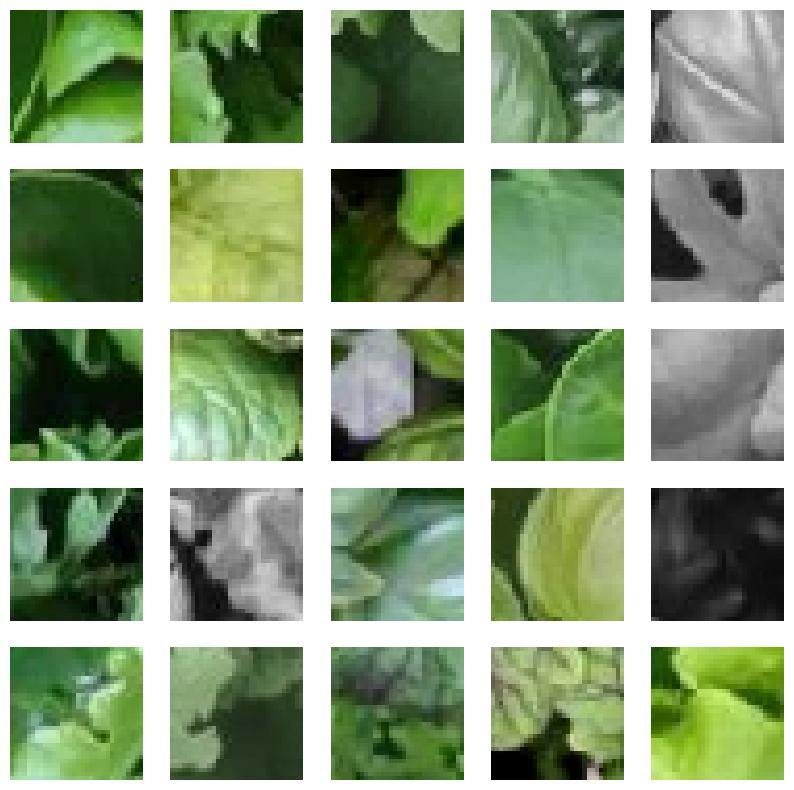

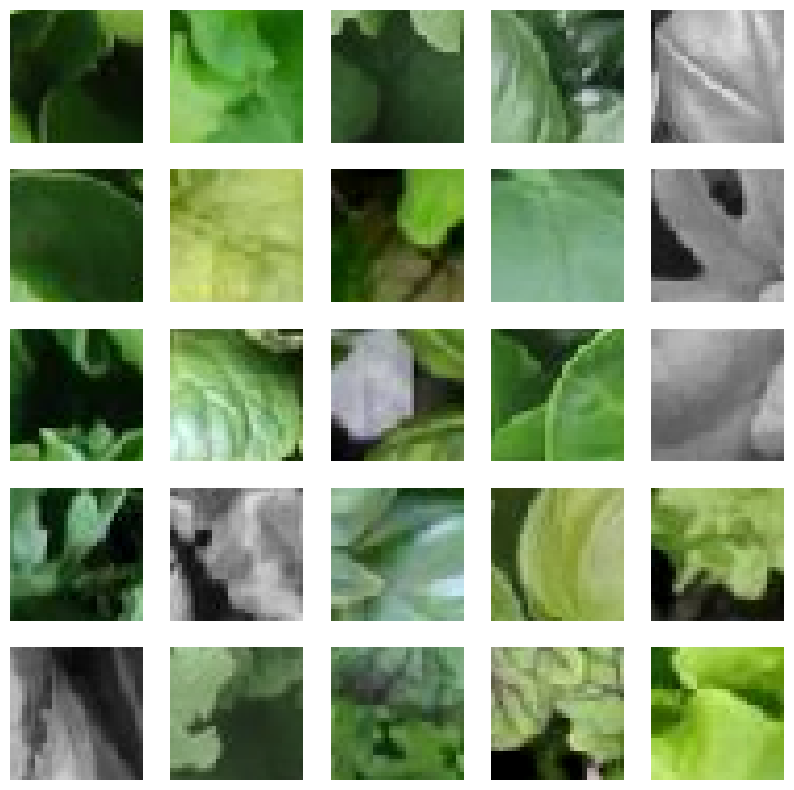

In [ ]:
ssl_ds_one = tf.data.Dataset.from_tensor_slices(X_train)
ssl_ds_one = (
    ssl_ds_one.shuffle(1024, seed=SEED)
    .map(custom_augment, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

ssl_ds_two = tf.data.Dataset.from_tensor_slices(X_train)
ssl_ds_two = (
    ssl_ds_two.shuffle(1024, seed=SEED)
    .map(custom_augment, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

# We then zip both of these datasets.
ssl_ds = tf.data.Dataset.zip((ssl_ds_one, ssl_ds_two))

# Visualize a few augmented images.
sample_images_one = next(iter(ssl_ds_one))
plt.figure(figsize=(10, 10))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(sample_images_one[n].numpy().astype("int"))
    plt.axis("off")
plt.show()

# Ensure that the different versions of the dataset actually contain
# identical images.
sample_images_two = next(iter(ssl_ds_two))
plt.figure(figsize=(10, 10))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(sample_images_two[n].numpy().astype("int"))
    plt.axis("off")
plt.show()

# Model:

In [ ]:
!wget -q https://git.io/JYx2x -O resnet_cifar10_v2.py
import resnet_cifar10_v2
#help(resnet_cifar10_v2)

In [ ]:
#from keras.applications.inception_v3 import InceptionV3
#inceptionV3_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(96,96,3))

In [ ]:
#help(tfk.applications.InceptionV3)
#x = inceptionV3_model.output

In [ ]:
N = 2
DEPTH = N * 9 + 2
NUM_BLOCKS = ((DEPTH - 2) // 9) - 1


def get_encoder():
    # Input and backbone.
    inputs = layers.Input((CROP_TO, CROP_TO, 3))
    x = layers.Rescaling(scale=1.0 / 127.5, offset=-1)(
        inputs
    )
    #x = inceptionV3_model.output
    x = resnet_cifar10_v2.stem(x)
    x = resnet_cifar10_v2.learner(x, NUM_BLOCKS)
    x = layers.GlobalAveragePooling2D(name="backbone_pool")(x)

    # Projection head.
    x = layers.Dense(
        PROJECT_DIM, use_bias=False, kernel_regularizer=regularizers.l2(WEIGHT_DECAY)
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dense(
        PROJECT_DIM, use_bias=False, kernel_regularizer=regularizers.l2(WEIGHT_DECAY)
    )(x)
    outputs = layers.BatchNormalization()(x)
    return tf.keras.Model(inputs, outputs, name="encoder")


def get_predictor():
    model = tf.keras.Sequential(
        [
            # Note the AutoEncoder-like structure.
            layers.Input((PROJECT_DIM,)),
            layers.Dense(
                LATENT_DIM,
                use_bias=False,
                kernel_regularizer=regularizers.l2(WEIGHT_DECAY),
            ),
            layers.ReLU(),
            layers.BatchNormalization(),
            layers.Dense(PROJECT_DIM),
        ],
        name="predictor",
    )
    return model

In [ ]:
def compute_loss(p, z):
    # The authors of SimSiam emphasize the impact of
    # the `stop_gradient` operator in the paper as it
    # has an important role in the overall optimization.
    z = tf.stop_gradient(z)
    p = tf.math.l2_normalize(p, axis=1)
    z = tf.math.l2_normalize(z, axis=1)
    # Negative cosine similarity (minimizing this is
    # equivalent to maximizing the similarity).
    return -tf.reduce_mean(tf.reduce_sum((p * z), axis=1))


In [ ]:
class SimSiam(tf.keras.Model):
    def __init__(self, encoder, predictor):
        super().__init__()
        self.encoder = encoder
        self.predictor = predictor
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        # Unpack the data.
        ds_one, ds_two = data

        # Forward pass through the encoder and predictor.
        with tf.GradientTape() as tape:
            z1, z2 = self.encoder(ds_one), self.encoder(ds_two)
            p1, p2 = self.predictor(z1), self.predictor(z2)
            # Note that here we are enforcing the network to match
            # the representations of two differently augmented batches
            # of data.
            loss = compute_loss(p1, z2) / 2 + compute_loss(p2, z1) / 2

        # Compute gradients and update the parameters.
        learnable_params = (
            self.encoder.trainable_variables + self.predictor.trainable_variables
        )
        gradients = tape.gradient(loss, learnable_params)
        self.optimizer.apply_gradients(zip(gradients, learnable_params))

        # Monitor loss.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

Epoch 1/5
36/36 [==============================] - 190s 5s/step - loss: -0.8008
Epoch 2/5
36/36 [==============================] - 169s 5s/step - loss: -0.8936
Epoch 3/5
36/36 [==============================] - 167s 5s/step - loss: -0.8953
Epoch 4/5
36/36 [==============================] - 175s 5s/step - loss: -0.8976
Epoch 5/5
36/36 [==============================] - 191s 5s/step - loss: -0.8972


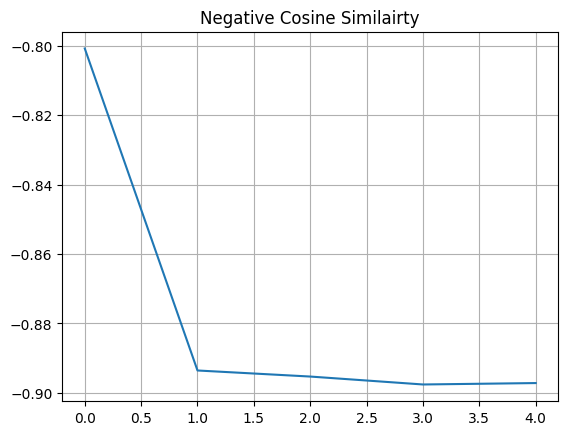

In [ ]:
# Create a cosine decay learning scheduler.
num_training_samples = len(X_train)
steps = EPOCHS * (num_training_samples // BATCH_SIZE)
lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.03, decay_steps=steps
)

# Create an early stopping callback.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="loss", patience=5, restore_best_weights=True
)

# Compile model and start training.
simsiam = SimSiam(get_encoder(), get_predictor())
simsiam.compile(optimizer=tf.keras.optimizers.SGD(lr_decayed_fn, momentum=0.6))
history = simsiam.fit(ssl_ds, epochs=EPOCHS, callbacks=[early_stopping])

# Visualize the training progress of the model.
plt.plot(history.history["loss"])
plt.grid()
plt.title("Negative Cosine Similairty")
plt.show()

In [ ]:
# We first create labeled `Dataset` objects.
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))

# Then we shuffle, batch, and prefetch this dataset for performance. We
# also apply random resized crops as an augmentation but only to the
# training set.
train_ds = (
    train_ds.shuffle(1024)
    .map(lambda x, y: (flip_random_crop(x), y), num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(AUTO)

# Extract the backbone ResNet20.
backbone = tf.keras.Model(
    simsiam.encoder.input, simsiam.encoder.get_layer("backbone_pool").output
)

# We then create our linear classifier and train it.
backbone.trainable = False
inputs = layers.Input((CROP_TO, CROP_TO, 3))
x = backbone(inputs, training=False)
outputs = layers.Dense(10, activation="softmax")(x)
linear_model = tf.keras.Model(inputs, outputs, name="linear_model")

# Compile model and start training.
linear_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.SGD(lr_decayed_fn, momentum=0.9),
)
history = linear_model.fit(
    train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[early_stopping]
)
_, test_acc = linear_model.evaluate(test_ds)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

Epoch 1/5


UnimplementedError: ignored